![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-large.png)

[National Science Data Fabric](https://nationalsciencedatafabric.org/)

# Converting Root Files

## BatNoise Files

In [78]:
#Import libraries
import uproot
import mplhep as hep 
from matplotlib import pyplot as plt

In [79]:
# Open the root file
# file = uproot.open("files/root/Test_23230808_020422_F0001.root")
file = uproot.open("files/root/Test_Filter_23230808_020422.root")
# listing the root file properties
all_keys = file.classnames()
print(all_keys)

{'zip4;1': 'TDirectory', 'zip4/PBS1NoisePSD;1': 'TH1D', 'zip4/PBS1NoiseFFT;1': 'TH1D', 'zip4/PBS1NoiseFFTsq;1': 'TH1D', 'zip4/PBS1OptimalFilterRe;1': 'TH1D', 'zip4/PBS1OptimalFilterIm;1': 'TH1D', 'zip4/PBS1NormFFT;1': 'TH1D', 'zip4/PBS1SigToNoiseSq;1': 'TH1D', 'zip4/PBS1PulseNorm;1': 'TH1D', 'zip4/PBS1TemplateTime;1': 'TH1D', 'zip4/PBS1TemplateFFTRe;1': 'TH1D', 'zip4/PBS1TemplateFFTIm;1': 'TH1D', 'zip4/PES1NoisePSD;1': 'TH1D', 'zip4/PES1NoiseFFT;1': 'TH1D', 'zip4/PES1NoiseFFTsq;1': 'TH1D', 'zip4/PES1OptimalFilterRe;1': 'TH1D', 'zip4/PES1OptimalFilterIm;1': 'TH1D', 'zip4/PES1NormFFT;1': 'TH1D', 'zip4/PES1SigToNoiseSq;1': 'TH1D', 'zip4/PES1PulseNorm;1': 'TH1D', 'zip4/PES1TemplateTime;1': 'TH1D', 'zip4/PES1TemplateFFTRe;1': 'TH1D', 'zip4/PES1TemplateFFTIm;1': 'TH1D', 'zip4/PAS1NoisePSD;1': 'TH1D', 'zip4/PAS1NoiseFFT;1': 'TH1D', 'zip4/PAS1NoiseFFTsq;1': 'TH1D', 'zip4/PAS1OptimalFilterRe;1': 'TH1D', 'zip4/PAS1OptimalFilterIm;1': 'TH1D', 'zip4/PAS1NormFFT;1': 'TH1D', 'zip4/PAS1SigToNoiseSq;1

In [80]:
#Extracting the TH1D properties
value_keys = dict(filter(lambda x:x[1]=='TH1D', all_keys.items()))
print(value_keys)

{'zip4/PBS1NoisePSD;1': 'TH1D', 'zip4/PBS1NoiseFFT;1': 'TH1D', 'zip4/PBS1NoiseFFTsq;1': 'TH1D', 'zip4/PBS1OptimalFilterRe;1': 'TH1D', 'zip4/PBS1OptimalFilterIm;1': 'TH1D', 'zip4/PBS1NormFFT;1': 'TH1D', 'zip4/PBS1SigToNoiseSq;1': 'TH1D', 'zip4/PBS1PulseNorm;1': 'TH1D', 'zip4/PBS1TemplateTime;1': 'TH1D', 'zip4/PBS1TemplateFFTRe;1': 'TH1D', 'zip4/PBS1TemplateFFTIm;1': 'TH1D', 'zip4/PES1NoisePSD;1': 'TH1D', 'zip4/PES1NoiseFFT;1': 'TH1D', 'zip4/PES1NoiseFFTsq;1': 'TH1D', 'zip4/PES1OptimalFilterRe;1': 'TH1D', 'zip4/PES1OptimalFilterIm;1': 'TH1D', 'zip4/PES1NormFFT;1': 'TH1D', 'zip4/PES1SigToNoiseSq;1': 'TH1D', 'zip4/PES1PulseNorm;1': 'TH1D', 'zip4/PES1TemplateTime;1': 'TH1D', 'zip4/PES1TemplateFFTRe;1': 'TH1D', 'zip4/PES1TemplateFFTIm;1': 'TH1D', 'zip4/PAS1NoisePSD;1': 'TH1D', 'zip4/PAS1NoiseFFT;1': 'TH1D', 'zip4/PAS1NoiseFFTsq;1': 'TH1D', 'zip4/PAS1OptimalFilterRe;1': 'TH1D', 'zip4/PAS1OptimalFilterIm;1': 'TH1D', 'zip4/PAS1NormFFT;1': 'TH1D', 'zip4/PAS1SigToNoiseSq;1': 'TH1D', 'zip4/PAS1Pul

Dropdown(description='Filter:', index=109, options=(('PBS1NoisePSD', 'zip4/PBS1NoisePSD;1'), ('PBS1NoiseFFT', …

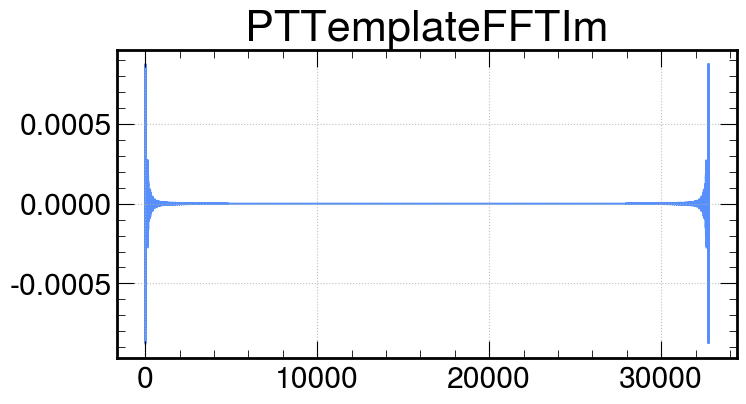

In [81]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Getting the list of possible values
options = list(value_keys.keys())
show_options = [
    x.replace(";1", "").split("/")[1]
    if len(x.replace(";1", "").split("/")) == 2
    else x.replace(";1", "").split("/")[2]
    for x in value_keys.keys()
]
options = [(y, x) for y, x in zip(show_options, options)]

# Creating the dropdown 
dropdown = widgets.Dropdown(options=options, description="Filter:")

# On change function
def on_change(change):
    
    if change["type"] == "change" and change["name"] == "value":
        clear_output(wait=1)
        display(dropdown)
        new_key = change.get("new")
        x, y = file[new_key].to_numpy()
        plt.style.use(hep.style.CMS)
        plt.figure(figsize=(8, 4))
        hep.histplot(x,y)
        plt.title(file[new_key].title)
        plt.grid(True)
        plt.show()

# Observe function
dropdown.observe(on_change)
# Show dropdown
display(dropdown)